<a href="https://colab.research.google.com/github/JOEJOSEJOSEPH/olympic_dataset/blob/main/olympic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# RegEx
import re

In [ ]:
athlete = pd.read_csv("/content/athlete_events.csv")
noc = pd.read_csv("/content/noc_regions.csv")

In [ ]:
ath = athlete.copy()
nat = noc.copy()

In [ ]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
nat.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
ath.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
ath.shape

(271116, 15)

In [ ]:
ath.isnull().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
nat.set_index('NOC')

,region,notes
NOC,,
AFG,Afghanistan,NaN
AHO,Curacao,Netherlands Antilles
ALB,Albania,NaN
ALG,Algeria,NaN
AND,Andorra,NaN
...,...,...
YEM,Yemen,NaN
YMD,Yemen,South Yemen
YUG,Serbia,Yugoslavia


In [ ]:
nat.set_index('NOC')['region']

NOC
AFG    Afghanistan
AHO        Curacao
ALB        Albania
ALG        Algeria
AND        Andorra
          ...     
YEM          Yemen
YMD          Yemen
YUG         Serbia
ZAM         Zambia
ZIM       Zimbabwe
Name: region, Length: 230, dtype: object

In [ ]:
ath['NOC']

0         CHN
1         CHN
2         DEN
3         DEN
4         NED
         ... 
271111    POL
271112    POL
271113    POL
271114    POL
271115    POL
Name: NOC, Length: 271116, dtype: object

In [ ]:
region_col = ath['NOC'].map(nat.set_index('NOC')['region'])
ath.insert(7, 'region', region_col)

In [ ]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,region,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,Poland,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
ath.drop("NOC", inplace = True, axis =1)

In [ ]:
ath.isnull().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
region       370
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
ath.Age.isnull()


0         False
1         False
2         False
3         False
4         False
          ...  
271111    False
271112    False
271113    False
271114    False
271115    False
Name: Age, Length: 271116, dtype: bool

In [ ]:
ath['Age'].fillna(ath.Age.mean(), inplace=True)
ath['Height'].fillna(ath.Height.mean(), inplace=True)
ath['Weight'].fillna(ath.Weight.mean(), inplace=True)

In [ ]:
ath.iloc[[147]]

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
147,54,Mohamed Jamshid Abadi,M,25.52346,175.526831,70.976801,Iran,Iran,1948 Summer,1948.0,Summer,London,Boxing,Boxing Men's Heavyweight,NaN


In [ ]:
ath.isnull().sum()

ID             0
Name           0
Gender         0
Age            0
Height         0
Weight         0
Team           0
region       370
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
ath['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [ ]:
ath['Medal'].nunique()

3

In [ ]:
ath['Medal'].replace([np.nan],[0], inplace=True)

In [ ]:
ath['Medal'].value_counts()

0         231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

In [ ]:
ath['Medal'].replace(['Gold'],[1], inplace=True)
ath['Medal'].replace(['Silver'],[2], inplace=True)
ath['Medal'].replace(['Bronze'],[3], inplace=True)

In [ ]:
ath

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.00000,89.000000,Poland-1,Poland,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.00000,59.000000,Poland,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,Poland,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [ ]:
ath['Medal'].value_counts()

0    231333
1     13372
3     13295
2     13116
Name: Medal, dtype: int64

In [ ]:
ath.Medal = ath.Medal.astype(int)

In [ ]:
ath.isnull().sum()

ID          0
Name        0
Gender      0
Age         0
Height      0
Weight      0
Team        0
region    370
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [ ]:
nat['region'].isnull().sum()

3

In [ ]:
# Columns to be drop off -

# 1. region
# 2. Games

ath.drop(["region","Games"],axis = 1,inplace =True)

KeyError: "['region', 'Games'] not found in axis"

In [ ]:
for i,j in zip(ath.Sport,range(len(ath.Event))):
  ath.Event[j] = re.sub(f"{i}\s","",ath.Event[j])

<ipython-input-101-e471ddc382cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ath.Event[j] = re.sub(f"{i}\s","",ath.Event[j])


KeyboardInterrupt: 

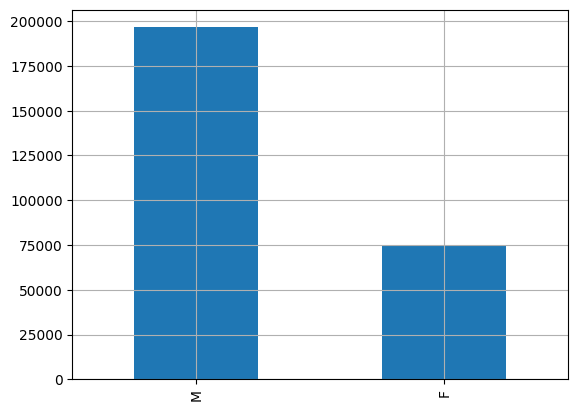

In [ ]:
ath['Gender'].value_counts().plot.bar(ath['Gender'])
plt.grid()

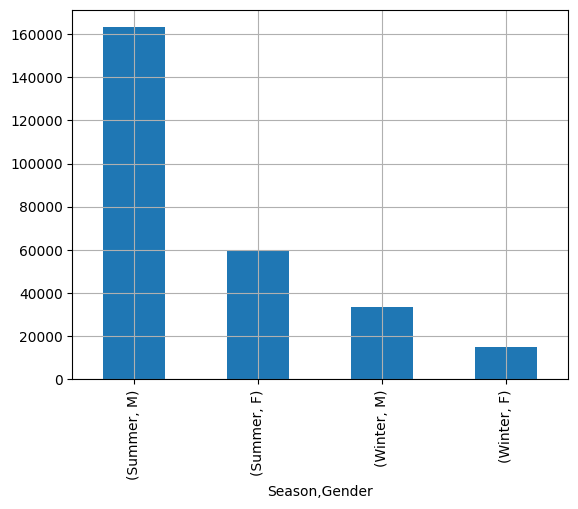

In [ ]:
ath['Gender'].groupby(ath['Season']).value_counts().plot.bar(ath['Gender'])
plt.grid()
plt.show()